In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.stderr = open(os.devnull, 'w')

# local crs
local_crs = 32636


In [2]:
city_geometry = gpd.read_parquet("/1NOTEBOOKS/data/city_geometry.parquet").to_crs(4326)
water_geometry = gpd.read_parquet("/1NOTEBOOKS/data/water_geometry.parquet").to_crs(4326)
roads_geometry = gpd.read_file("/1NOTEBOOKS/mydata/vas_ostrov/roads.geojson").to_crs(4326)
railways_geometry = gpd.read_file("/1NOTEBOOKS/mydata/vas_ostrov/railways.geojson").to_crs(4326)

In [3]:
city_geometry = city_geometry.to_crs(local_crs)
water_geometry = water_geometry.to_crs(local_crs)
roads_geometry = roads_geometry.to_crs(local_crs)
railways_geometry = railways_geometry.to_crs(local_crs)

In [4]:
from blocksnet import BlocksGenerator

In [5]:
blocks = BlocksGenerator(
  territory=city_geometry,
  water=water_geometry,
  roads=roads_geometry,
  railways=railways_geometry
).generate_blocks()

GENERATING BLOCKS
Setting up enclosures...
Filling holes...
Dropping overlapping blocks...
Calculating blocks area...
Blocks generated.



<Axes: >

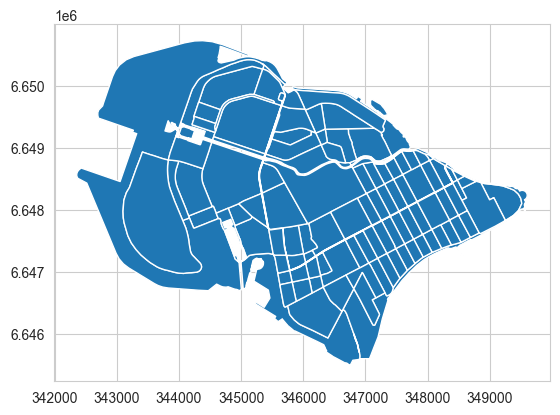

In [6]:
blocks.plot()

In [7]:
from blocksnet import GraphGenerator
intermodal_graph = GraphGenerator(territory=blocks).get_graph('intermodal')

Graph made for 'walk' network type
Graph made for 'bus'
Graph made for 'trolleybus'
Graph made for 'tram'
Graph made for 'subway'


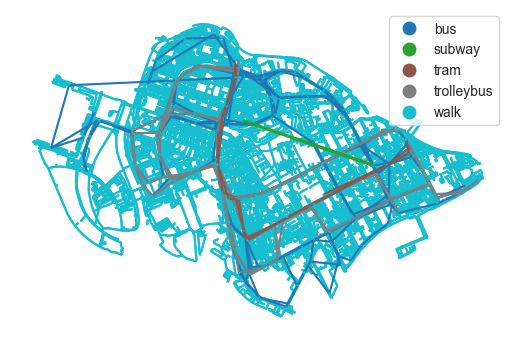

In [15]:
GraphGenerator.plot(intermodal_graph)

In [16]:
from blocksnet import AdjacencyCalculator

adjacency_matrix = AdjacencyCalculator(blocks=blocks, graph=intermodal_graph).get_dataframe()

In [19]:
adjacency_matrix

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,10.0,31.9,30.3,33.3,26.6,29.8,29.7,32.0,30.0,...,31.4,28.4,28.4,28.4,28.4,34.9,32.2,16.2,16.2,30.0
1,10.0,0.0,30.4,28.8,31.5,24.8,28.0,27.9,30.4,28.5,...,29.9,26.9,26.9,26.9,26.9,33.3,30.4,9.3,9.3,28.2
2,34.2,31.7,0.0,9.5,20.9,19.0,16.3,20.2,11.1,29.2,...,30.6,27.6,27.6,27.6,27.6,7.4,30.9,30.7,30.7,25.1
3,32.6,30.1,9.5,0.0,13.0,18.0,18.6,19.9,14.5,27.6,...,29.0,26.0,26.0,26.0,26.0,15.2,30.6,29.1,29.1,24.8
4,37.7,35.4,20.9,13.0,0.0,15.3,27.7,22.2,23.1,30.5,...,31.9,28.9,28.9,28.9,28.9,26.0,35.2,34.4,34.4,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,35.4,32.9,7.4,15.2,26.0,20.5,13.9,21.0,8.7,30.4,...,31.8,28.8,28.8,28.8,28.8,0.0,32.6,31.9,31.9,26.8
167,30.7,31.2,32.0,33.1,33.1,25.3,28.1,28.0,30.5,42.3,...,43.7,40.7,40.7,40.7,40.7,33.4,0.0,35.9,35.9,28.0
168,16.9,9.3,32.7,31.1,34.1,27.4,30.6,30.5,32.8,30.8,...,32.2,29.2,29.2,29.2,29.2,35.7,33.0,0.0,0.0,30.8
169,16.9,9.3,32.7,31.1,34.1,27.4,30.6,30.5,32.8,30.8,...,32.2,29.2,29.2,29.2,29.2,35.7,33.0,0.0,0.0,30.8


In [20]:
from blocksnet import City

city_model = City(
  blocks_gdf=blocks,
  adjacency_matrix=adjacency_matrix,
)
     

In [21]:
print(city_model)

CRS:          : EPSG:32636
Blocks count  : 171
Service types : 
    3.5.1      school               15 min     120/1000 population 
    3.5.1      kindergarten         7 min      61/1000 population  
    3.4.2      hospital             60 min     9/1000 population   
    3.4.1      polyclinic           10 min     13/1000 population  
    5.1.3      pitch                60 min     10/1000 population  
    5.1.2      swimming_pool        30 min     8/1000 population   
    5.1.1      stadium              30 min     10/1000 population  
    3.6.1      theatre              60 min     6/1000 population   
    3.6.1      museum               60 min     1/1000 population   
    3.6.1      cinema               60 min     9/1000 population   
    4.2        mall                 30 min     8/1000 population   
    4.4        convenience          5 min      180/1000 population 
    4.4        supermarket          15 min     900/1000 population 
    3.7.1      religion             30 min     10/10

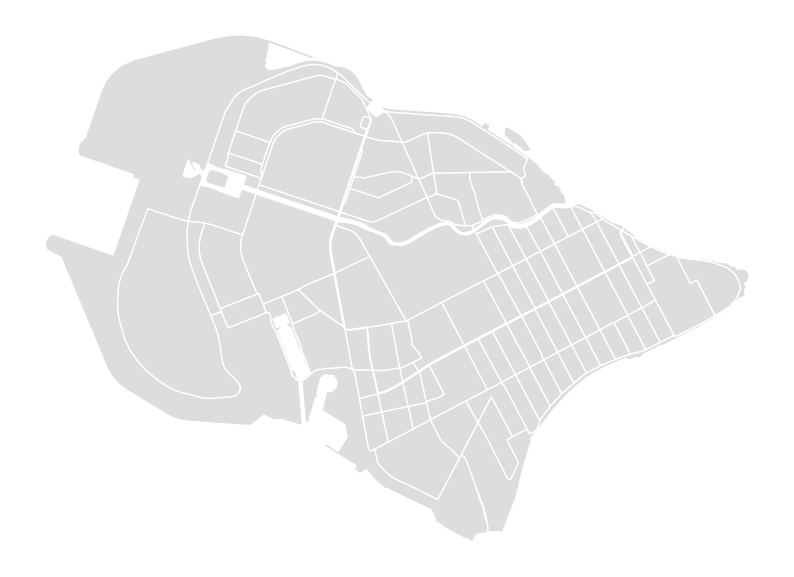

In [22]:
city_model.plot()

In [26]:
city_model.get_services_gdf()

,geometry,capacity,service_type


In [27]:
school = gpd.read_parquet("/1NOTEBOOKS/data/schools.parquet").to_crs(local_crs)
kindergarten = gpd.read_parquet("/1NOTEBOOKS/data/kindergartens.parquet").to_crs(local_crs)
hospital = gpd.read_file("/1NOTEBOOKS/data/hospitals.geojson").to_crs(local_crs)
polyclinic = gpd.read_file("/1NOTEBOOKS/data/policlinics.geojson").to_crs(local_crs)

services = {"school": school, "kindergarten": kindergarten,
            "hospital": hospital,"polyclinic": polyclinic}

for service_type, gdf in services.items():
    city_model.update_services(service_type, gdf)

In [28]:
city_model.get_services_gdf()

,geometry,capacity,service_type
0,POINT (346250.527 6649432.576),960,school
1,POINT (344685.271 6649951.453),96,school
2,POINT (345196.204 6650054.547),235,school
3,POINT (344950.101 6648432.999),1244,school
4,POINT (344780.761 6648505.608),1200,school
...,...,...,...
97,POINT (347816.854 6648393.652),4000,polyclinic
98,POINT (345677.302 6649059.946),983,polyclinic
99,POINT (347708.879 6647596.135),5095,polyclinic
100,POINT (347436.439 6647416.665),5286,polyclinic


In [30]:
from blocksnet.method import Provision
prov = Provision(city_model=city_model)

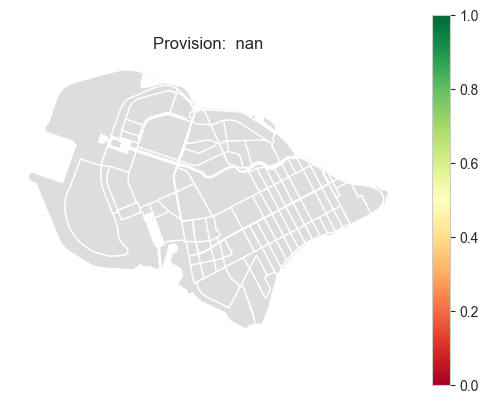

In [32]:
calc_before = prov.calculate('school')
prov.plot(calc_before)

In [33]:
buildings = gpd.read_parquet("/1NOTEBOOKS/data/buildings.parquet").to_crs(local_crs)
buildings = buildings.rename(columns={
  'storeys_count': 'floors',
  'population_balanced': 'population',
  'total_area': 'area'
})

city_model.update_buildings(buildings)

In [34]:
from blocksnet.method import Provision
prov = Provision(city_model=city_model)

In [36]:
city_model.get_blocks_gdf()

,geometry
id,
0,"POLYGON ((345747.414 6646456.191, 345751.077 6..."
1,"POLYGON ((345751.077 6646449.404, 345747.414 6..."
2,"POLYGON ((347254.878 6649205.849, 347271.628 6..."
3,"POLYGON ((347271.628 6649199.671, 347254.878 6..."
4,"POLYGON ((346381.789 6649088.828, 346384.777 6..."
...,...
166,"POLYGON ((347085.604 6649687.434, 347085.603 6..."
167,"POLYGON ((344025.781 6649195.000, 344017.118 6..."
168,"POLYGON ((346871.489 6645844.206, 346855.702 6..."


In [37]:
from blocksnet.method.vacant_area import VacantArea
vacant_area = VacantArea(city_model=city_model)

In [39]:
result_list

[                                              geometry          area  \
 0    POLYGON ((343789.017 6646857.247, 343788.913 6...    583.140555   
 1    POLYGON ((343562.276 6647209.954, 343562.384 6...    951.919646   
 2    POLYGON ((343746.552 6647192.582, 343746.594 6...   1819.541607   
 3    POLYGON ((343849.538 6647215.288, 343849.628 6...  17547.962111   
 4    POLYGON ((343676.772 6647228.079, 343676.671 6...    541.997440   
 ..                                                 ...           ...   
 273  POLYGON ((347977.651 6648145.215, 347977.554 6...   1612.062629   
 274  POLYGON ((348231.356 6647981.190, 348232.010 6...    745.606407   
 275  POLYGON ((349561.287 6648097.510, 349561.186 6...    317.474862   
 276  POLYGON ((348686.577 6648236.679, 348686.502 6...    287.860367   
 277  POLYGON ((349332.980 6648275.038, 349333.088 6...    290.437810   
 
          length  
 0    120.584587  
 1    127.926256  
 2    298.167092  
 3    874.085845  
 4    149.141419  
 ..     

In [40]:
result_list_gdf = gpd.GeoDataFrame(columns=['id', 'geometry', 'area'], geometry='geometry')

In [41]:
for gdf in result_list:
    if gdf.empty:
        continue
    result_list_gdf = gpd.GeoDataFrame(pd.concat([result_list_gdf, gdf], ignore_index=True))
result_list_gdf    
    

,id,geometry,area,length
0,NaN,"POLYGON ((343789.017 6646857.247, 343788.913 6...",583.140555,120.584587
1,NaN,"POLYGON ((343562.276 6647209.954, 343562.384 6...",951.919646,127.926256
2,NaN,"POLYGON ((343746.552 6647192.582, 343746.594 6...",1819.541607,298.167092
3,NaN,"POLYGON ((343849.538 6647215.288, 343849.628 6...",17547.962111,874.085845
4,NaN,"POLYGON ((343676.772 6647228.079, 343676.671 6...",541.997440,149.141419
...,...,...,...,...
539,NaN,"POLYGON ((345399.470 6647750.662, 345397.555 6...",857.479262,217.356366
540,NaN,"POLYGON ((345299.920 6647817.935, 345299.814 6...",830.131023,196.813477
541,NaN,"POLYGON ((347971.432 6648156.132, 347971.332 6...",1612.062629,204.075232
542,NaN,"POLYGON ((348209.112 6647915.186, 348209.221 6...",292.344178,69.245740


In [42]:
result_list_gdf.to_file("/1NOTEBOOKS/data/vacant_area_results_ALL2.geojson", driver="GeoJSON")

In [43]:
city_model.to_pickle("city_model_vas_ostrov.pickle")

In [8]:
intermodal_graph

In [9]:
import osmnx as ox

In [14]:
geo_dataframe_node = ox.utils_graph.graph_to_gdfs(
    intermodal_graph, nodes=True, edges=False, node_geometry=True,
    fill_edge_geometry=False)

In [15]:
type(geo_dataframe)

tuple

In [16]:
geodf_edge = ox.utils_graph.graph_to_gdfs(
    intermodal_graph, nodes=False, edges=True, node_geometry=False,
    fill_edge_geometry=True)

In [22]:
geodf_edge.to_file("D:/1NOTEBOOKS/mydata/intermodal_graph.geojson", driver="GeoJSON")

ValueError: Invalid field type <class 'list'>

In [20]:
type(geodf_edge)

geopandas.geodataframe.GeoDataFrame

In [21]:
geodf_edge

osmid  \
u                           v                           key                                      
223647                      1394530252                  0                            125586508   
1394530252                  223647                      0                            125586508   
                            1394530248                  0                            125586508   
                                                        1    [942921897, 942921899, 628771367]   
                            1394530253                  0                            298332957   
...                                                                                        ...   
subway_4274068418697309995  4151902109                  0                                  NaN   
subway_-3648010060136171185 6952658632                  0                                  NaN   
subway_8309453815538177899  subway_-3096254044702985072 0                                  NaN   
                            3897084921                  0                                  NaN   
subway_-3096254044702985072 4168997232                  0                                  NaN   

                                                                           name  \
u                           v                           key                       
223647                      1394530252                  0    Румянцевский спуск   
1394530252                  223647                      0    Румянцевский спуск   
                            1394530248                  0    Румянцевский спуск   
                                                        1                   NaN   
                            1394530253                  0                   NaN   
...                                                                         ...   
subway_4274068418697309995  4151902109                  0                   NaN   
subway_-3648010060136171185 6952658632                  0                   NaN   
subway_8309453815538177899  subway_-3096254044702985072 0                   NaN   
                            3897084921                  0                   NaN   
subway_-3096254044702985072 4168997232                  0                   NaN   

                                                                      highway  \
u                           v                           key                     
223647                      1394530252                  0          pedestrian   
1394530252                  223647                      0          pedestrian   
                            1394530248                  0          pedestrian   
                                                        1    [steps, footway]   
                            1394530253                  0             footway   
...                                                                       ...   
subway_4274068418697309995  4151902109                  0                 NaN   
subway_-3648010060136171185 6952658632                  0                 NaN   
subway_8309453815538177899  subway_-3096254044702985072 0                 NaN   
                            3897084921                  0                 NaN   
subway_-3096254044702985072 4168997232                  0                 NaN   

                                                            oneway reversed  \
u                           v                           key                   
223647                      1394530252                  0    False     True   
1394530252                  223647                      0    False    False   
                            1394530248                  0    False     True   
                                                        1    False    False   
                            1394530253                  0    False     True   
...                                                            ...      ...   
subway_4274068418697309995  4151902109          